In [1]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

# Import Module

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
import seaborn as sns

import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

# Import Data

In [3]:
# Code
df_side = pd.read_excel('assignment2_regression_govt_spending.xlsx',sheet_name="side") #ตัวอย่าง
df_side.replace({'..':np.nan},inplace=True)
df_side.head()


,ปี,การป้องกันประเทศ,การรักษาความสงบภายใน,การเศรษฐกิจ,การสาธารณสุข,การศาสนา วัฒนธรรม และนันทนาการ,การศึกษา,การสังคมสงเคราะห์
0,2547,74106.0,65171.0,282325.2,83650.3,6560.5,251194.0,108278.0
1,2548,78052.8,66727.2,296571.2,89163.7,7109.0,262721.8,85975.9
2,2549,85107.6,77857.1,339783.5,101040.5,9943.3,295622.8,95559.5
3,2550,114696.2,87631.5,332282.9,148704.5,13089.4,355241.1,112398.8
4,2551,141265.8,93033.4,321879.7,153825.4,13614.3,363164.2,115085.9


In [4]:
df_budget = pd.read_excel('assignment2_regression_govt_spending.xlsx',sheet_name="budget") 
df_budget.replace({'..':np.nan},inplace=True)
df_budget.head()

,ปี,งบกลาง,สำนักนายกรัฐมนตรี,กระทรวงกลาโหม,กระทรวงการคลัง,กระทรวงการต่างประเทศ,กระทรวงการท่องเที่ยวและกีฬา,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,กระทรวงเกษตรเเละสหกรณ์,กระทรวงคมนาคม,...,กระทรวงพลังงาน,กระทรวงพาณิชย์,กระทรวงมหาดไทย,กระทรวงยุติธรรม,กระทรวงเเรงงาน,กระทรวงวัฒนธรรม,กระทรวงวิทยาศาสตร์และเทคโนโลยี,กระทรวงศึกษาธิการ,กระทรวงสาธารณสุข,กระทรวงอุตสาหกรรม
0,2547,130325.6982,7437.5239,78551.3245,131532.3509,5401.1813,2572.6008,4026.5131,53084.8043,51642.2188,...,1555.1703,4620.8538,102793.9181,11305.3150,12958.5813,2239.6428,5130.5591,190262.8362,45147.8912,3037.9549
1,2548,200189.9838,9465.8280,81241.3899,140176.6018,5648.4780,2403.0069,4755.3858,52131.1367,66443.3708,...,1609.7556,4658.0021,139800.1791,11753.7794,17679.2534,2480.8597,6671.8609,203752.3867,45014.4048,3697.8785
2,2549,256220.0081,15188.5060,85936.1180,144371.5171,6334.6295,2978.6333,5968.2579,55150.4657,66054.9252,...,1705.8282,4829.7984,160643.4755,12449.7379,18819.2455,2937.3920,9995.3871,225592.2688,52652.2127,3908.4547
3,2550,197650.6613,14395.7081,115024.0148,172907.0925,7321.3340,3413.2816,8632.2180,64972.7696,70546.8483,...,2199.2721,5826.1381,179115.7526,13934.8587,25228.8420,4281.0641,9803.8393,282254.3414,62279.2224,4528.4215
4,2551,242774.5848,13579.6648,143518.9011,180496.5578,7587.3383,3656.9314,9129.7977,65193.2776,65679.7689,...,2465.2720,6152.7260,190930.1453,14451.6034,26162.5259,4371.0958,8349.9708,301085.1582,65434.7853,5080.9628


# Part 1

สร้างโมเดล  multiple linear regression  ทำนายค่าใช้จ่ายรัฐบาลตามลักษณะงาน โดยใช้ข้อมูลงบประมาณรายจ่ายกระทรวงต่างๆ


### Part 1.1

จากลักษณะงานที่กลุ่มได้รับมอบหมาย  สร้างโมเดลทำนายค่าใช้จ่ายรัฐบาลตามลักษณะงานนั้น โดยใช้กระทรวงตามค่า correlation

In [5]:
# รวมตารางข้อมูล
data1 = df_budget.join(df_side[["การเศรษฐกิจ"]])
data1.head()

,ปี,งบกลาง,สำนักนายกรัฐมนตรี,กระทรวงกลาโหม,กระทรวงการคลัง,กระทรวงการต่างประเทศ,กระทรวงการท่องเที่ยวและกีฬา,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,กระทรวงเกษตรเเละสหกรณ์,กระทรวงคมนาคม,...,กระทรวงพาณิชย์,กระทรวงมหาดไทย,กระทรวงยุติธรรม,กระทรวงเเรงงาน,กระทรวงวัฒนธรรม,กระทรวงวิทยาศาสตร์และเทคโนโลยี,กระทรวงศึกษาธิการ,กระทรวงสาธารณสุข,กระทรวงอุตสาหกรรม,การเศรษฐกิจ
0,2547,130325.6982,7437.5239,78551.3245,131532.3509,5401.1813,2572.6008,4026.5131,53084.8043,51642.2188,...,4620.8538,102793.9181,11305.3150,12958.5813,2239.6428,5130.5591,190262.8362,45147.8912,3037.9549,282325.2
1,2548,200189.9838,9465.8280,81241.3899,140176.6018,5648.4780,2403.0069,4755.3858,52131.1367,66443.3708,...,4658.0021,139800.1791,11753.7794,17679.2534,2480.8597,6671.8609,203752.3867,45014.4048,3697.8785,296571.2
2,2549,256220.0081,15188.5060,85936.1180,144371.5171,6334.6295,2978.6333,5968.2579,55150.4657,66054.9252,...,4829.7984,160643.4755,12449.7379,18819.2455,2937.3920,9995.3871,225592.2688,52652.2127,3908.4547,339783.5
3,2550,197650.6613,14395.7081,115024.0148,172907.0925,7321.3340,3413.2816,8632.2180,64972.7696,70546.8483,...,5826.1381,179115.7526,13934.8587,25228.8420,4281.0641,9803.8393,282254.3414,62279.2224,4528.4215,332282.9
4,2551,242774.5848,13579.6648,143518.9011,180496.5578,7587.3383,3656.9314,9129.7977,65193.2776,65679.7689,...,6152.7260,190930.1453,14451.6034,26162.5259,4371.0958,8349.9708,301085.1582,65434.7853,5080.9628,321879.7


<AxesSubplot:>

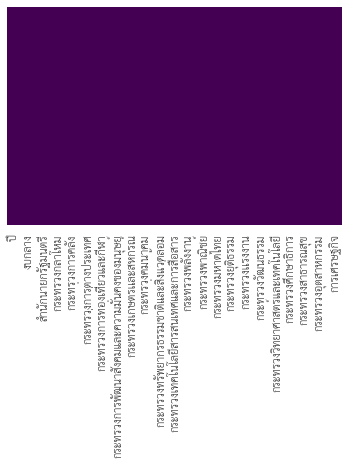

In [6]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

[Text(0.5, 0, 'ปี'),
 Text(1.5, 0, 'งบกลาง'),
 Text(2.5, 0, 'สำนักนายกรัฐมนตรี'),
 Text(3.5, 0, 'กระทรวงกลาโหม'),
 Text(4.5, 0, 'กระทรวงการคลัง'),
 Text(5.5, 0, 'กระทรวงการต่างประเทศ'),
 Text(6.5, 0, 'กระทรวงการท่องเที่ยวและกีฬา'),
 Text(7.5, 0, 'กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์'),
 Text(8.5, 0, 'กระทรวงเกษตรเเละสหกรณ์'),
 Text(9.5, 0, 'กระทรวงคมนาคม'),
 Text(10.5, 0, 'กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม'),
 Text(11.5, 0, 'กระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร'),
 Text(12.5, 0, 'กระทรวงพลังงาน'),
 Text(13.5, 0, 'กระทรวงพาณิชย์'),
 Text(14.5, 0, 'กระทรวงมหาดไทย'),
 Text(15.5, 0, 'กระทรวงยุติธรรม'),
 Text(16.5, 0, 'กระทรวงเเรงงาน'),
 Text(17.5, 0, 'กระทรวงวัฒนธรรม'),
 Text(18.5, 0, 'กระทรวงวิทยาศาสตร์และเทคโนโลยี'),
 Text(19.5, 0, 'กระทรวงศึกษาธิการ'),
 Text(20.5, 0, 'กระทรวงสาธารณสุข'),
 Text(21.5, 0, 'กระทรวงอุตสาหกรรม'),
 Text(22.5, 0, 'การเศรษฐกิจ')]

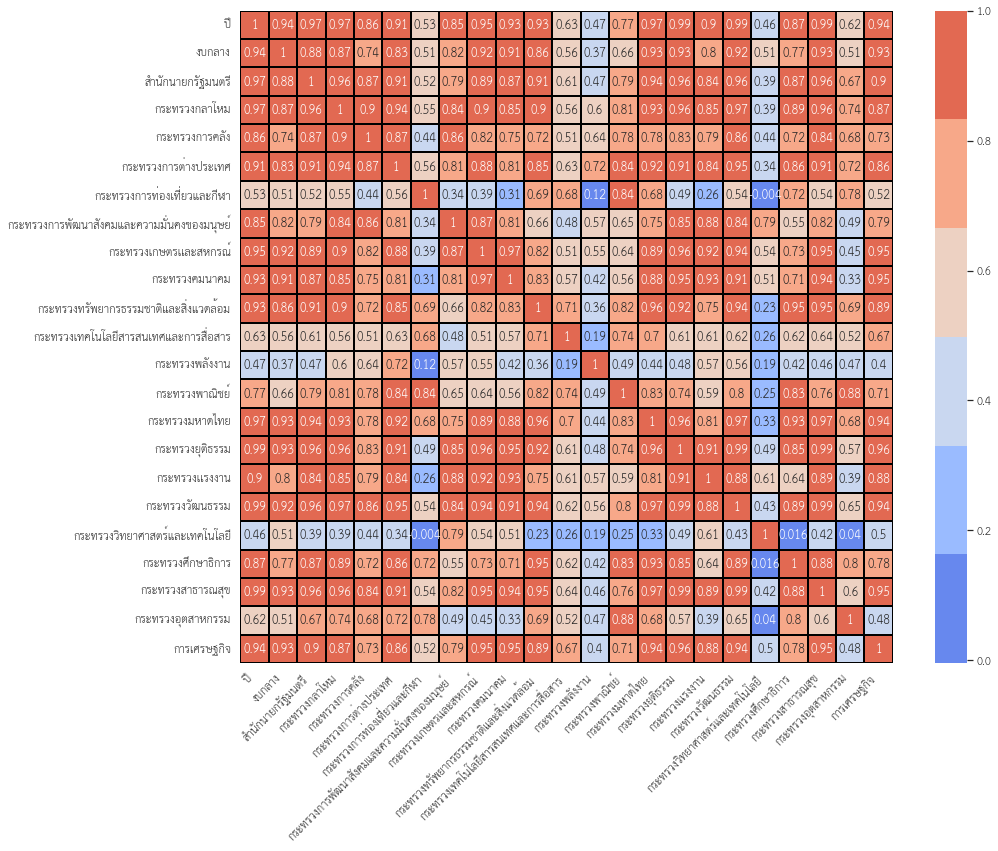

In [7]:
plt.figure(figsize = (15,12))
heatmap_data1 = sns.heatmap(data1.corr(),
            square=True,
            linewidths=0.2,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=True)

heatmap_data1.set_xticklabels(heatmap_data1.get_xticklabels(), rotation=45, horizontalalignment='right')

งบประมาณกระทรวงที่มีค่า correlation กับงบประมาณด้านการเศรษฐกิจสูง 5 ลำดับแรกได้แก่กระทรวงยุติธรรม,กระทรวงสาธารณสุข,กระทรวงคมนาคม,กระทรวงเกษตรและสหกรณ์, และกระทรวงมหาดไทย

##### Model เดิม

In [8]:
Model1_add_constant = sm.add_constant(data1[["กระทรวงยุติธรรม","กระทรวงสาธารณสุข","กระทรวงคมนาคม","กระทรวงเกษตรเเละสหกรณ์", "กระทรวงมหาดไทย"]], prepend=False)
model1_statModel = sm.OLS(data1["การเศรษฐกิจ"], Model1_add_constant)
results_model1 = model1_statModel.fit()
print(results_model1.summary())

                            OLS Regression Results                            
Dep. Variable:            การเศรษฐกิจ   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     54.42
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.19e-07
Time:                        11:21:14   Log-Likelihood:                -197.22
No. Observations:                  17   AIC:                             406.4
Df Residuals:                      11   BIC:                             411.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
กระทรวงยุติธรรม            2

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


จาก stat model จะพบว่ากระทรวงยุติธรรมไม่ส่งผลต่อค่าใช้จ่ายรัฐบาลด้านการเศรษฐกิจจึงนำออกจากการเป็นตัวแปรต้นและนำตัวแปรที่เหลือไปสร้างโมเดลใหม่

##### Model ใหม่

In [9]:
Model1_add_constant_new = sm.add_constant(data1[["กระทรวงสาธารณสุข","กระทรวงคมนาคม","กระทรวงเกษตรเเละสหกรณ์", "กระทรวงมหาดไทย"]], prepend=False)
model1_statModel_new = sm.OLS(data1["การเศรษฐกิจ"], Model1_add_constant_new)
results_model1_new = model1_statModel_new.fit()
print(results_model1_new.summary())

                            OLS Regression Results                            
Dep. Variable:            การเศรษฐกิจ   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     73.96
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.37e-08
Time:                        11:21:14   Log-Likelihood:                -197.24
No. Observations:                  17   AIC:                             404.5
Df Residuals:                      12   BIC:                             408.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
กระทรวงสาธารณสุข          -1

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Part 1.2

จากลักษณะงานที่ได้รับมอบหมาย  สร้างโมเดลทำนายค่าใช้จ่ายรัฐบาลตามลักษณะงานนั้น
โดยใช้กระทรวงที่ทางกลุ่มเลือก


### Model เดิม

In [10]:
Model2_add_constant = sm.add_constant(data1[["กระทรวงการคลัง","กระทรวงการต่างประเทศ","กระทรวงอุตสาหกรรม","กระทรวงการท่องเที่ยวและกีฬา","กระทรวงคมนาคม"]], prepend=False)
model2_statModel = sm.OLS(data1["การเศรษฐกิจ"], Model2_add_constant)
results_model2 = model2_statModel.fit()
print(results_model2.summary())

                            OLS Regression Results                            
Dep. Variable:            การเศรษฐกิจ   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     62.27
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.08e-07
Time:                        11:21:14   Log-Likelihood:                -196.11
No. Observations:                  17   AIC:                             404.2
Df Residuals:                      11   BIC:                             409.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
กระทรวงการคลัง    

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


จาก stat model จะพบว่ากระทรวงกลาโหมไม่ส่งผลต่อค่าใช้จ่ายรัฐบาลด้านการเศรษฐกิจจึงนำออกจากการเป็นตัวแปรต้นและนำตัวแปรที่เหลือไปสร้างโมเดลใหม่

### Model ใหม่

In [11]:
Model2_add_constant_new = sm.add_constant(data1[["กระทรวงการคลัง","กระทรวงการท่องเที่ยวและกีฬา","กระทรวงคมนาคม"]], prepend=False)
model2_statModel_new = sm.OLS(data1["การเศรษฐกิจ"], Model2_add_constant_new)
results_model2_new = model2_statModel_new.fit()
print(results_model2_new.summary())

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:            การเศรษฐกิจ   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     110.4
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.69e-09
Time:                        11:21:14   Log-Likelihood:                -196.98
No. Observations:                  17   AIC:                             402.0
Df Residuals:                      13   BIC:                             405.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
กระทรวงการคลัง    

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Part 2

กระทรวงที่ 1 ที่ทางกลุ่มได้รับมอบหมาย เป็นตัวแปรต้นที่ส่งผล ของโมเดลทำนายค่าใช้จ่ายรัฐบาลตามลักษณะงาน อย่างน้อย 2 ด้าน  โดยที่ค่า r-square  ของทั้ง 2 ด้าน ไม่ต่ำกว่า 0.9
ระบุด้านดังกล่าว มา 2 ด้าน  (แสดงวิธีทำการได้มาของด้านดังกล่าวในรายงานด้วย)


In [12]:
data_part2 = df_side.join(df_budget["กระทรวงกลาโหม"])
data_part2.head()

,ปี,การป้องกันประเทศ,การรักษาความสงบภายใน,การเศรษฐกิจ,การสาธารณสุข,การศาสนา วัฒนธรรม และนันทนาการ,การศึกษา,การสังคมสงเคราะห์,กระทรวงกลาโหม
0,2547,74106.0,65171.0,282325.2,83650.3,6560.5,251194.0,108278.0,78551.3245
1,2548,78052.8,66727.2,296571.2,89163.7,7109.0,262721.8,85975.9,81241.3899
2,2549,85107.6,77857.1,339783.5,101040.5,9943.3,295622.8,95559.5,85936.1180
3,2550,114696.2,87631.5,332282.9,148704.5,13089.4,355241.1,112398.8,115024.0148
4,2551,141265.8,93033.4,321879.7,153825.4,13614.3,363164.2,115085.9,143518.9011


In [13]:
data_part2.columns

Index(['ปี', 'การป้องกันประเทศ', 'การรักษาความสงบภายใน', 'การเศรษฐกิจ',
       'การสาธารณสุข', 'การศาสนา วัฒนธรรม และนันทนาการ', 'การศึกษา',
       'การสังคมสงเคราะห์', 'กระทรวงกลาโหม'],
      dtype='object')

### เลือกลักษณะงาน อย่างน้อย 2 ด้าน

In [14]:
X_part2 = sm.add_constant(data_part2[['การป้องกันประเทศ', 'การรักษาความสงบภายใน', 'การเศรษฐกิจ',
       'การสาธารณสุข', 'การศาสนา วัฒนธรรม และนันทนาการ', 'การศึกษา',
       'การสังคมสงเคราะห์']], prepend=False)
model_checkPart2 = sm.OLS(data_part2['กระทรวงกลาโหม'], X_part2)
results_part2 = model_checkPart2.fit()
print(results_part2.summary())

                            OLS Regression Results                            
Dep. Variable:          กระทรวงกลาโหม   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4734.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.59e-15
Time:                        11:21:15   Log-Likelihood:                -137.94
No. Observations:                  17   AIC:                             291.9
Df Residuals:                       9   BIC:                             298.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
การป้องกันปร

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### สร้าง Model Part2

In [15]:
X_part2_real = sm.add_constant(data_part2[['การรักษาความสงบภายใน', 'การศาสนา วัฒนธรรม และนันทนาการ']], prepend=False)
model_Part2 = sm.OLS(data_part2['กระทรวงกลาโหม'], X_part2_real)
results_part2_real = model_Part2.fit()
print(results_part2_real.summary())

                            OLS Regression Results                            
Dep. Variable:          กระทรวงกลาโหม   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           4.02e-10
Time:                        11:21:15   Log-Likelihood:                -181.46
No. Observations:                  17   AIC:                             368.9
Df Residuals:                      14   BIC:                             371.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
การรักษาความ

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Part 3

จากโมเดลของด้านที่ได้รับมอบหมาย สร้าง Nonlinear regression 3 โมเดล ได้แก่ Logarithm Function, Exponential function และ Power function    
คำแนะนำ   ใช้ log ของ numpy library ช่วยในการใส่ค่า log ใน dataframe และอาจต้องปรับใช้ normalization ที่ให้ค่าไม่เป็นศูนย์  เพราะ log 0 = undefined.


In [16]:
data1.columns

Index(['ปี', 'งบกลาง', 'สำนักนายกรัฐมนตรี', 'กระทรวงกลาโหม', 'กระทรวงการคลัง',
       'กระทรวงการต่างประเทศ', 'กระทรวงการท่องเที่ยวและกีฬา',
       'กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์', 'กระทรวงเกษตรเเละสหกรณ์',
       'กระทรวงคมนาคม', 'กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม',
       'กระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร', 'กระทรวงพลังงาน',
       'กระทรวงพาณิชย์', 'กระทรวงมหาดไทย', 'กระทรวงยุติธรรม', 'กระทรวงเเรงงาน',
       'กระทรวงวัฒนธรรม', 'กระทรวงวิทยาศาสตร์และเทคโนโลยี',
       'กระทรวงศึกษาธิการ', 'กระทรวงสาธารณสุข', 'กระทรวงอุตสาหกรรม',
       'การเศรษฐกิจ'],
      dtype='object')

In [18]:
X_data = data1[['กระทรวงกลาโหม', 'กระทรวงมหาดไทย', 'กระทรวงพาณิชย์']]
X_data = sm.add_constant(X_data, prepend=False)
X_data.head()

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,กระทรวงกลาโหม,กระทรวงมหาดไทย,กระทรวงพาณิชย์,const
0,78551.3245,102793.9181,4620.8538,1.0
1,81241.3899,139800.1791,4658.0021,1.0
2,85936.1180,160643.4755,4829.7984,1.0
3,115024.0148,179115.7526,5826.1381,1.0
4,143518.9011,190930.1453,6152.7260,1.0


In [32]:
X_data_log = np.log(data1[['กระทรวงกลาโหม', 'กระทรวงมหาดไทย', 'กระทรวงพาณิชย์']])
X_data_log = sm.add_constant(X_data_log, prepend=False)
X_data_log.head()


/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,กระทรวงกลาโหม,กระทรวงมหาดไทย,กระทรวงพาณิชย์,const
0,11.271508,11.540481,8.438335,1.0
1,11.305180,11.847969,8.446342,1.0
2,11.361359,11.986943,8.482560,1.0
3,11.652896,12.095788,8.670110,1.0
4,11.874222,12.159663,8.724651,1.0


In [34]:
y_data = data1[['การเศรษฐกิจ']]
y_data.head()

,การเศรษฐกิจ
0,282325.2
1,296571.2
2,339783.5
3,332282.9
4,321879.7


In [35]:
y_data_log = np.log(data1[['การเศรษฐกิจ']])
y_data_log.head()

,การเศรษฐกิจ
0,12.550815
1,12.600043
2,12.736064
3,12.713742
4,12.681933


### Linear Model

In [36]:
X_train_data_linear, X_test_data_linear, y_train_data_linear, y_test_data_linear = train_test_split(X_data, y_data, test_size=0.05, random_state=14)

In [37]:
linear_m = LinearRegression()
linear_m.fit(X_train_data_linear, y_train_data_linear)


LinearRegression()

In [38]:
linear_m.coef_

array([[  0.79077787,   1.65777431, -64.33995231,   0.        ]])

In [39]:
predictions_linear = linear_m.predict(X_train_data_linear)
predictions_linear

array([[609101.09620232],
       [336626.51247461],
       [586253.15886555],
       [315520.44014953],
       [298787.35476869],
       [325999.95740301],
       [347909.68198292],
       [655201.14524946],
       [237702.20166671],
       [570382.52528306],
       [479124.21434712],
       [374416.84603471],
       [333714.52158343],
       [569637.17598562],
       [484574.80356113],
       [552705.06444216]])

In [40]:
metrics.mean_squared_error(y_train_data_linear,predictions_linear) #MSE

1739986160.5842066

In [41]:
metrics.mean_squared_error(y_train_data_linear,predictions_linear,squared=False) #RMSE

41713.14134159889

In [42]:
metrics.r2_score(y_train_data_linear,predictions_linear) #R**2

0.906638809431278

In [43]:
metrics.mean_absolute_percentage_error(y_train_data_linear,predictions_linear) #MAPE

0.07562839776906603

### Logarithm

In [45]:
X_train_data_loga, X_test_data_loga, y_train_data_loga, y_test_data_loga = train_test_split(X_data_log, y_data, test_size=0.05, random_state=14)


In [46]:
linear_loga = LinearRegression()
linear_loga.fit(X_train_data_loga, y_train_data_loga)

LinearRegression()

In [47]:
linear_loga.coef_


array([[ 135156.28169847,  424888.26297734, -590709.56919107,
              0.        ]])

In [48]:
predictions_loga = linear_loga.predict(X_train_data_loga)
predictions_loga


array([[593660.74108068],
       [355317.383724  ],
       [561010.97374699],
       [330481.73074799],
       [310372.44017645],
       [355619.20214354],
       [363074.3824778 ],
       [633742.2347691 ],
       [179903.25290446],
       [565927.60582991],
       [479176.29233465],
       [389905.70765786],
       [348874.30355536],
       [559668.73668781],
       [506923.40258791],
       [543998.30957551]])

In [49]:
metrics.mean_squared_error(y_train_data_loga,predictions_loga) #MSE

3000879616.6887584

In [50]:
metrics.mean_squared_error(y_train_data_loga,predictions_loga,squared=False) #RMSE

54780.28492704979

In [51]:
metrics.r2_score(y_train_data_loga,predictions_loga) #R**2

0.83898395279569

In [53]:
metrics.mean_absolute_percentage_error(y_train_data_loga,predictions_loga) #MAPE

0.10272203844441222

In [ ]:
#MAD

### Exponential

In [54]:
X_train_data_expo, X_test_data_expo, y_train_data_expo, y_test_data_expo = train_test_split(X_data, y_data_log, test_size=0.05, random_state=14)


In [55]:
linear_expo = LinearRegression()
linear_expo.fit(X_train_data_expo, y_train_data_expo)


LinearRegression()

In [56]:
linear_expo.coef_


array([[ 1.13031800e-07,  4.16458093e-06, -8.68968525e-05,
         0.00000000e+00]])

In [57]:
predictions_expo = linear_expo.predict(X_train_data_expo)
predictions_expo


array([[13.3151685 ],
       [12.70611228],
       [13.26956218],
       [12.68206891],
       [12.61602486],
       [12.68843055],
       [12.70426742],
       [13.40481956],
       [12.4648333 ],
       [13.22823983],
       [13.09029851],
       [12.81003086],
       [12.68649427],
       [13.25126133],
       [13.06354599],
       [13.23812123]])

In [58]:
metrics.mean_squared_error(y_train_data_expo,predictions_expo) #MSE

0.00973479279567459

In [59]:
metrics.mean_squared_error(y_train_data_expo,predictions_expo,squared=False) #RMSE

0.09866505356849804

In [60]:
metrics.r2_score(y_train_data_expo,predictions_expo) #R**2

0.901285645402581

In [61]:
metrics.mean_absolute_percentage_error(y_train_data_expo,predictions_expo) #MAPE

0.005243380581674374

In [ ]:
#MAD

### Power

In [62]:
X_train_data_power, X_test_data_power, y_train_data_power, y_test_data_power = train_test_split(X_data_log, y_data_log, test_size=0.05, random_state=14)


In [63]:
linear_power = LinearRegression()
linear_power.fit(X_train_data_power, y_train_data_power)


LinearRegression()

In [64]:
linear_power.coef_


array([[ 0.04451621,  1.04749095, -0.90799981,  0.        ]])

In [65]:
predictions_power = linear_power.predict(X_train_data_power)
predictions_power


array([[13.28401284],
       [12.74393924],
       [13.22314943],
       [12.71670089],
       [12.64481569],
       [12.76000388],
       [12.73693308],
       [13.35981929],
       [12.32849636],
       [13.22202224],
       [13.08656778],
       [12.84566976],
       [12.71639296],
       [13.22837316],
       [13.10895578],
       [13.21342717]])

In [66]:
metrics.mean_squared_error(y_train_data_loga,predictions_power) #MSE

214302273811.4282

In [67]:
metrics.mean_squared_error(y_train_data_power,predictions_power,squared=False) #RMSE

0.12137300562075658

In [68]:
metrics.r2_score(y_train_data_power,predictions_power) #R**2

0.8506181574860079

In [69]:
metrics.mean_absolute_percentage_error(y_train_data_power,predictions_power) #MAPE

0.006239773732915088

In [ ]:
#MAD

# Part 4

สร้างโมเดล โดยใช้ข้อมูลตัวแปรต้นหรือ input 3 ตัว จากสำนักงานสถิติแห่งชาติ 
http://statbbi.nso.go.th/staticreport/page/sector/th/index.aspx
ทำนายงบประมาณรายจ่ายกระทรวงที่ 3 (กระทรวงพาณิชย์)

หมายเหตุ  ไม่จำเป็นต้องใช้ข้อมูลงบประมาณรายจ่ายกระทรวงทุกปีที่ให้ไป เนื่องจากข้อมูลตัวแปรต้นอาจมีไม่ครบทุกปี

ให้เหตุผลในการเลือกตัวแปรต้นดังกล่าว 
- วิเคราะห์โมเดลที่ได้ ประเมินว่า  โมเดลนี้เป็นโมเดลที่ดีหรือไม่
- หากมีข้อมูลตัวแปรต้นที่ส่งผลต่องบประมาณรายจ่าย  วิเคราะห์ว่า  เหตุใดตัวแปรต้น จึงส่งผล และส่งผลต่อ งบประมาณรายจ่ายรวมของกระทรวง มากหรือน้อย 
- หากมีข้อมูลตัวแปรต้นที่ไม่ส่งผลต่องบประมาณรายจ่าย  วิเคราะห์ว่า  เหตุใดตัวแปรต้น จึงไม่ส่งผล

คำแนะนำ    ไม่ควรดูแต่สัมประสิทธิ์   ควรหาเหตุผลมาประกอบการอภิปราย   เช่น  ดูรายละเอียดของงบประมาณรายจ่ายกระทรวง และโครงสร้างของกระทรวงนี้เพิ่มเติม



In [31]:
# Code